In [1]:
from prody import *

from pylab import *

ion()

@> 5194 atoms and 1 coordinate set(s) were parsed in 0.02s.


<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

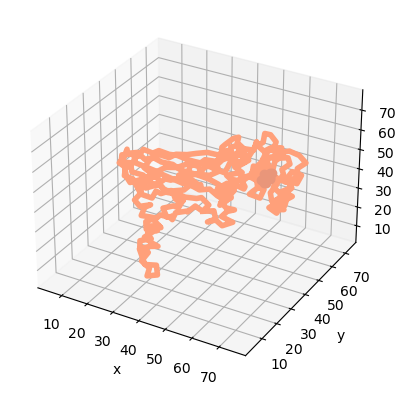

In [2]:
mono_3b3j_structure = parsePDB('../3b3j/monomer/analysis/3b3j_mono_InitFrame.pdb')

showProtein(mono_3b3j_structure)

In [3]:
mono_3b3j_dcd = DCDFile('../3b3j/monomer/analysis/aligned_3b3j_monomer_md400_ski10.dcd')

mono_3b3j_dcd.link(mono_3b3j_structure)

mono_3b3j_dcd.setAtoms(mono_3b3j_structure)

mono_3b3j_dcd

<DCDFile: aligned_3b3j_monomer_md400_ski10 (linked to AtomGroup 3b3j_mono_InitFrame; next 0 of 4000 frames; 5194 atoms)>

In [4]:
mono_3b3j_pca = PCA('Inactive Monomer PCA')

mono_3b3j_pca.buildCovariance(mono_3b3j_dcd)

mono_3b3j_pca.calcModes()

repr(mono_3b3j_pca)

@> Covariance will be calculated using 4000 frames.
@> Covariance matrix calculated in 2086.281263s.
@> 20 modes were calculated in 261.70s.


'<PCA: Inactive Monomer PCA (20 modes; 5194 atoms)>'

In [5]:
writeNMD('mono_3b3j_pca10.nmd', mono_3b3j_pca[:9], mono_3b3j_structure)

'mono_3b3j_pca10.nmd'

In [6]:
for mode in mono_3b3j_pca[:9]:
    print(calcFractVariance(mode).round(3))

0.165
0.107
0.069
0.059
0.036
0.029
0.024
0.021
0.017


## ANM  calculation

In [7]:
inactiveMonomer = parsePDB('3b3j_clean_Nter_trimmed.pdb', compressed=False)
inactiveMonomer_ca = inactiveMonomer.select('calpha')

@> 2611 atoms and 1 coordinate set(s) were parsed in 0.01s.


In [8]:
anm_inactiveMonomer_ca = ANM('Inactive_Monomer_3b3f')
anm_inactiveMonomer_ca.buildHessian(inactiveMonomer_ca)
anm_inactiveMonomer_ca.calcModes()

@> Hessian was built in 0.05s.
@> 20 modes were calculated in 0.03s.


## Compare with ANM results

In [ ]:
printOverlapTable(mono_3b3j_pca[:20], anm_inactiveMonomer_ca[:20])